In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics#tofind error score

Data collection and Processing

In [6]:
gold_data=pd.read_csv("/content/gld_price_data.csv")


In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
correlation=gold_data.corr()

<Axes: >

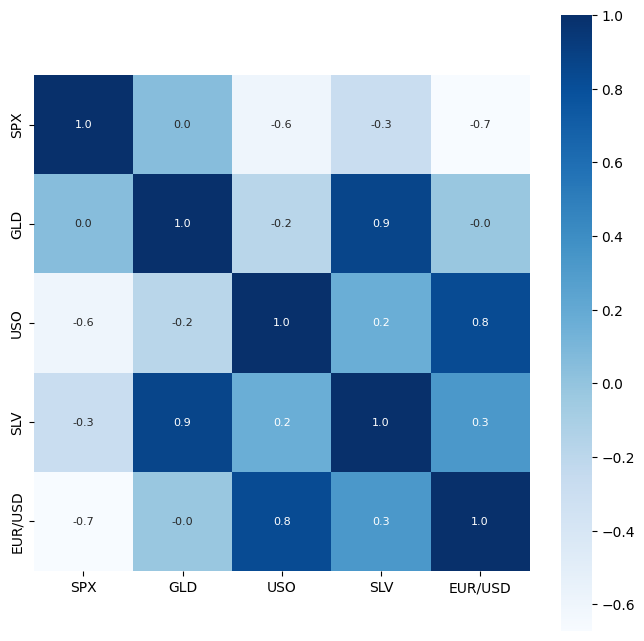

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


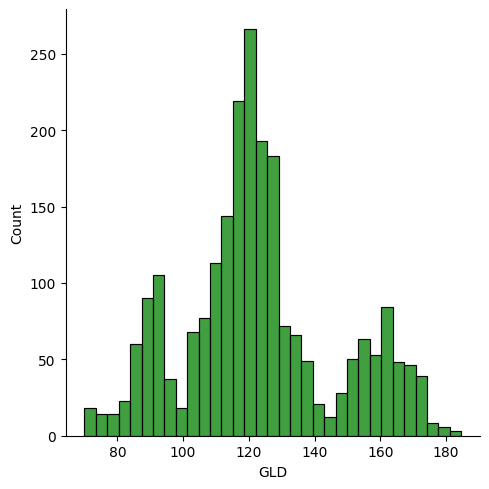

In [9]:
sns.displot(gold_data['GLD'],color='Green')

In [ ]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.63169941  82.1719999  116.00770028 127.44880083 120.66720125
 154.99289825 150.5702987  126.24730055 117.34969878 126.05160041
 116.72000098 172.15350053 141.53989886 167.62819819 115.25350034
 117.50450045 139.38740327 170.21120096 160.28440256 158.36699896
 155.14269999 125.30160015 175.58089978 156.77700289 125.15010036
  93.70539986  77.14300017 120.76570029 119.15139931 167.48299972
  88.18870071 125.21580014  91.08290084 117.64740041 121.14899896
 136.35900076 115.49190098 115.07570097 148.0131992  107.36500129
 103.9673025   87.31209795 126.56850024 118.24319998 152.81219836
 119.66049988 108.25910039 107.91489851  93.21000063 127.19889754
  75.08050053 113.47879922 121.24020009 111.32359915 118.95869883
 120.54139952 159.09259969 166.42320065 147.06079713  85.89049891
  94.23720024  86.89029906  90.6187003  118.9531008  126.39090091
 127.64810023 168.47190012 122.27179936 117.46379902  98.30710052
 167.96810135 142.88169806 131.99050196 121.24920229 121.06419951
 119.77980

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9892660809992527


In [ ]:
y_test=list(y_test)

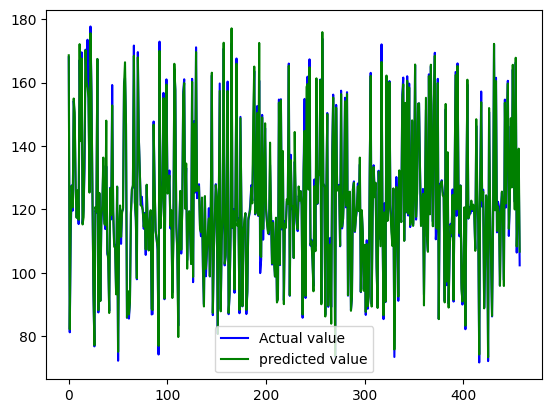

In [ ]:
plt.plot(y_test,color='blue',label='Actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.legend()
plt.show()